<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/regularized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [ ]:
# Load required libraries
library(glmnet)
library(tidyverse)
library (dplyr)
library(ggplot2)

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.2”
Loaded glmnet 4.1-8

Warning message:
“package ‘dplyr’ was built under R version 4.2.1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”


We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [4]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [13]:
# (a) Split data into training and test sets
set.seed(123) # For reproducibility
train_indices <- sample(1:n, 50)
test_indices <- setdiff(1:n, train_indices)

# Create training dataframe
train_df <- data.frame(x = x[train_indices], y = y[train_indices])

# Create test dataframe
test_df <- data.frame(x = x[test_indices], y = y[test_indices])

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

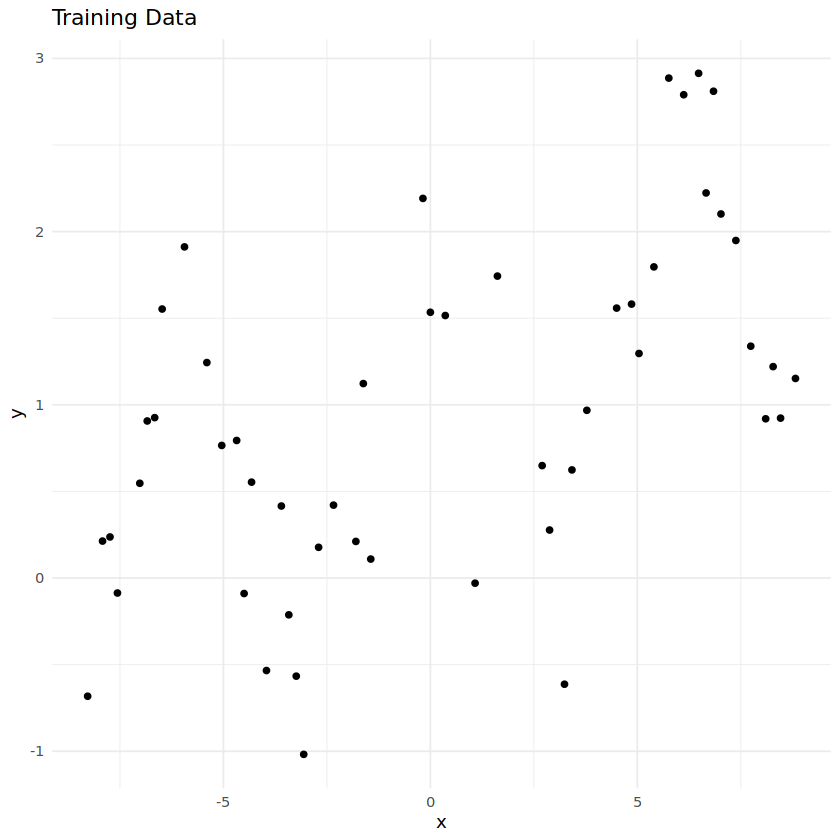

In [14]:
# (b) Plot the training data
ggplot(train_df, aes(x = x, y = y)) +
  geom_point() +
  labs(title = "Training Data",
       x = "x",
       y = "y") +
  theme_minimal()

How would you describe the relationship between $x$ and $y$ based on this plot?

> the data appears totally random with a possible oscillating pattern and a slight upward trend.
> 

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

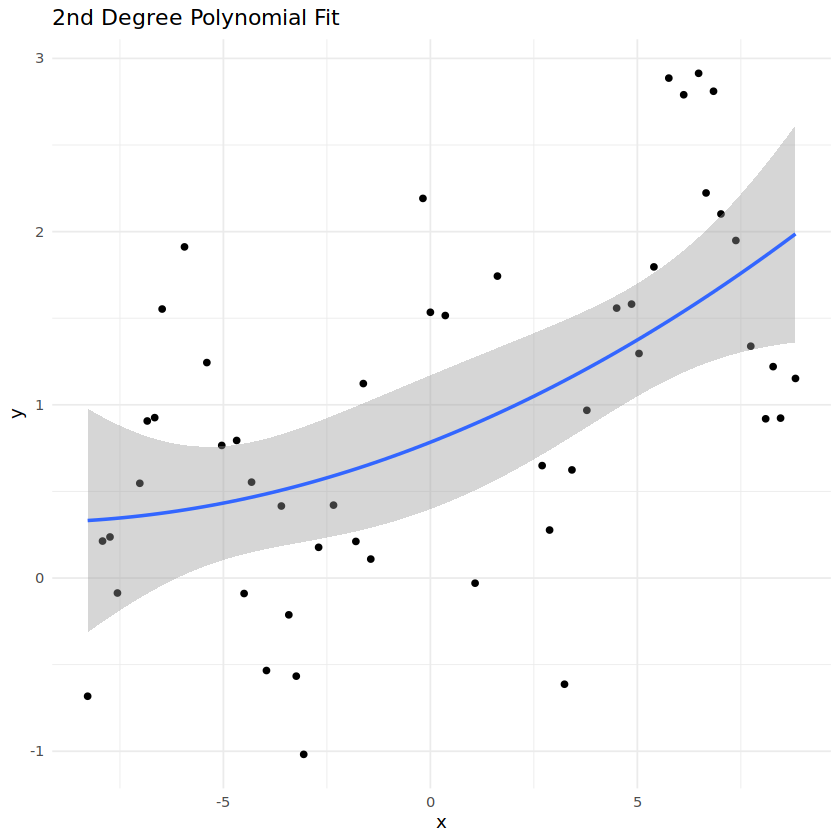

In [15]:
# (a) Fit a 2nd degree polynomial model
ggplot(train_df, aes(x = x, y = y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2), se = TRUE) +
  labs(title = "2nd Degree Polynomial Fit",
       x = "x",
       y = "y") +
  theme_minimal()

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> this 2nd degree polynomial fits pretty poorly - capturing only more of the mean of the cumulative data. It misses the a majority of the data. 
> 

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

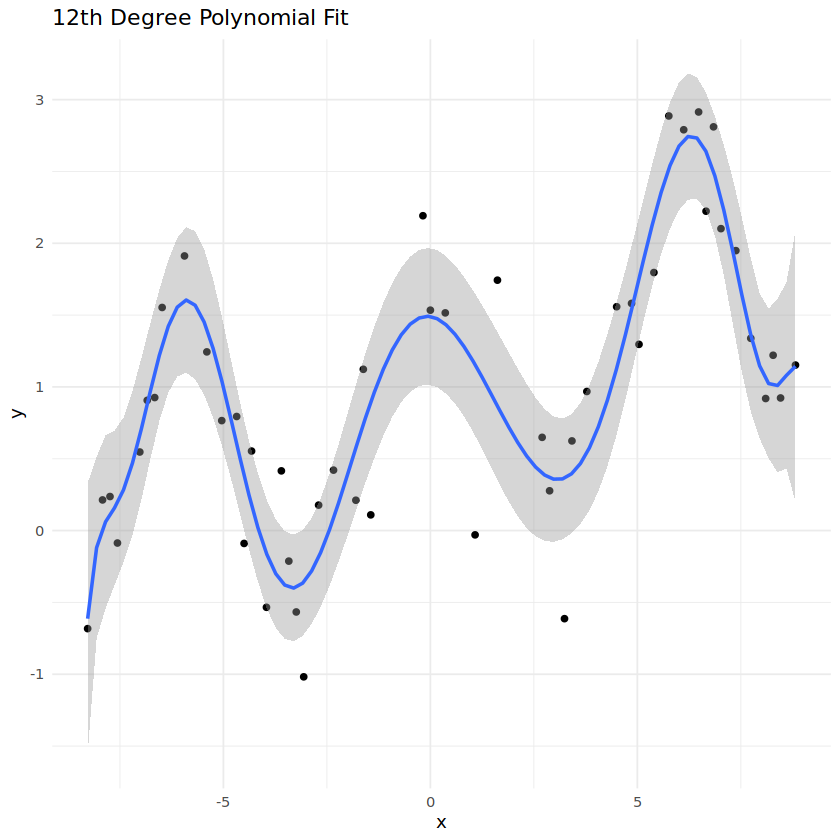

In [16]:
# (b) Fit a 12th degree polynomial model
ggplot(train_df, aes(x = x, y = y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 12), se = TRUE) +
  labs(title = "12th Degree Polynomial Fit",
       x = "x",
       y = "y") +
  theme_minimal()

> This does qualitatively better than the 2nd degree model. 
> 

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction 

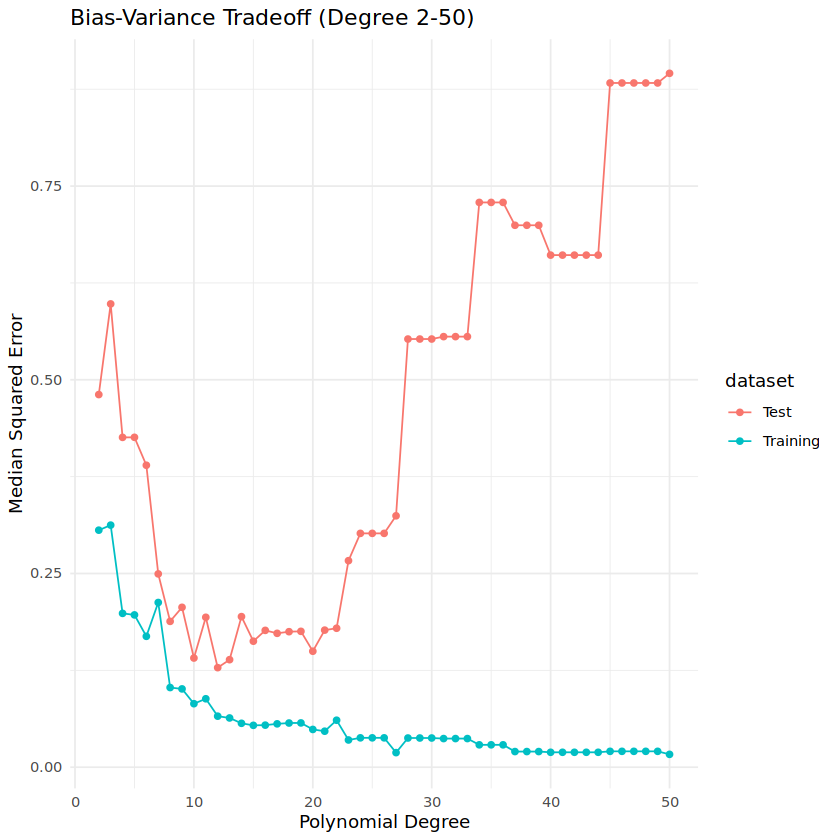

In [ ]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (i in 1:length(degree)) {
    k = degree[i]
    
    # Fit polynomial model
    model <- lm(y ~ poly(x, k, raw=TRUE), data = train_df)
    
    # Get predictions
    train_pred <- predict(model, train_df)
    test_pred <- predict(model, test_df)
    
    # Calculate squared errors
    train_sq_errors <- (train_df$y - train_pred)^2
    test_sq_errors <- (test_df$y - test_pred)^2
    
    # Store median squared errors
    train_rss[i] <- median(train_sq_errors)
    test_rss[i] <- median(test_sq_errors)
}

# Plot your results here
results_df <- data.frame(
  degree = rep(degree, 2),
  dataset = c(rep("Training", length(degree)), rep("Test", length(degree))),
  median_squared_error = c(train_rss, test_rss)
)

ggplot(results_df, aes(x = degree, y = median_squared_error, color = dataset)) +
  geom_line() +
  geom_point() +
  labs(title = "Bias-Variance Tradeoff (Degree 2-50)",
       x = "Polynomial Degree",
       y = "Median Squared Error") +
  theme_minimal()


What do you see as $k$ increase?

> As k increases, the training error decreases. The test error initially decreases but eventually begins to increase. 
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train_df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test_df):
“prediction 

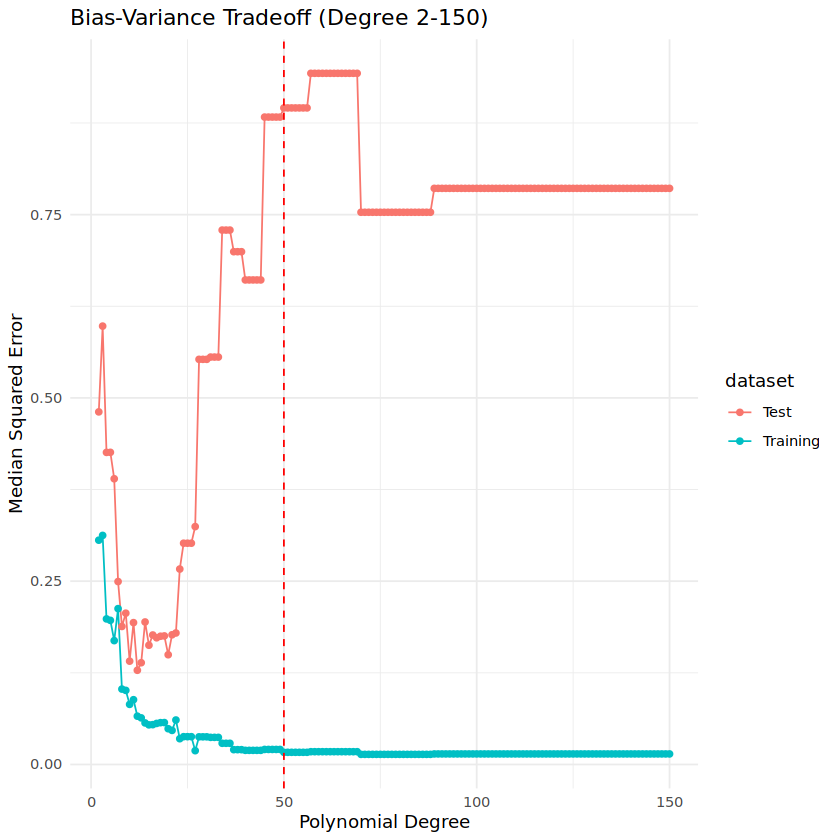

In [26]:
# Now do the variance-bias trade off analysis using regular regression for higher degrees
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (i in 1:length(degree)) {
  k = degree[i]
  # Fit polynomial model
  model <- lm(y ~ poly(x, k, raw=TRUE), data = train_df)
  # Get predictions
  train_pred <- predict(model, train_df)
  test_pred <- predict(model, test_df)
  # Calculate squared errors
  train_sq_errors <- (train_df$y - train_pred)^2
  test_sq_errors <- (test_df$y - test_pred)^2
  # Store median squared errors
  train_rss[i] <- median(train_sq_errors)
  test_rss[i] <- median(test_sq_errors)
}

# Plot your results here
results_df <- data.frame(
  degree = rep(degree, 2),
  dataset = c(rep("Training", length(degree)), rep("Test", length(degree))),
  median_squared_error = c(train_rss, test_rss)
)

ggplot(results_df, aes(x = degree, y = median_squared_error, color = dataset)) +
  geom_line() +
  geom_point() +
  geom_vline(xintercept = 50, linetype = "dashed", color = "red") +
  labs(title = "Bias-Variance Tradeoff (Degree 2-150)",
       x = "Polynomial Degree",
       y = "Median Squared Error") +
  theme_minimal()

What do you see as $k$ gets larger than $n$?

> When k exceeds n, the training error approaches zero as the model fits the training data (including noise), but the test error increases due to overfitting.

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

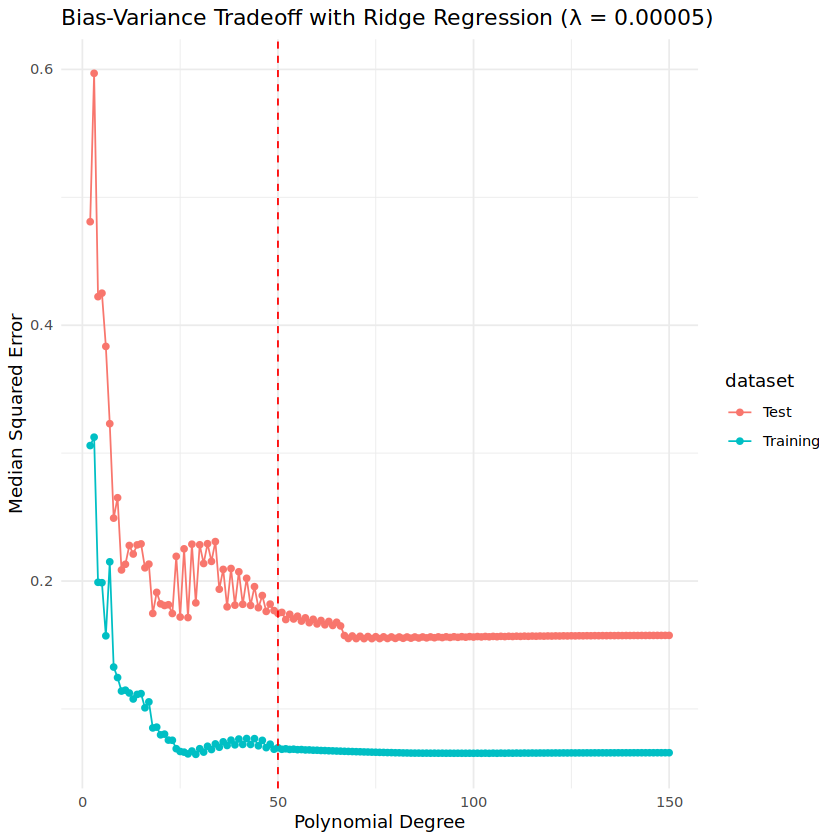

In [27]:
# Now do the variance-bias trade off analysis using ridge regression
lambda = 0.00005
degree = seq(2, 150)

train_rss = matrix(data=NA, nrow=length(degree), ncol=1)
test_rss = matrix(data=NA, nrow=length(degree), ncol=1)

for (i in 1:length(degree)) {
  k = degree[i]
  
  # Create polynomial design matrix
  x_train_poly <- poly(train_df$x, k, raw = TRUE)
  x_test_poly <- poly(test_df$x, k, raw = TRUE)
  
  # Fit ridge regression model
  ridge_model <- glmnet(x_train_poly, train_df$y, alpha = 0, lambda = lambda)
  
  # Get predictions
  train_pred <- predict(ridge_model, x_train_poly, s = lambda)
  test_pred <- predict(ridge_model, x_test_poly, s = lambda)
  
  # Calculate squared errors
  train_sq_errors <- (train_df$y - train_pred)^2
  test_sq_errors <- (test_df$y - test_pred)^2
  
  # Store median squared errors
  train_rss[i] <- median(train_sq_errors)
  test_rss[i] <- median(test_sq_errors)
}

# Plot your results here
results_df <- data.frame(
  degree = rep(degree, 2),
  dataset = c(rep("Training", length(degree)), rep("Test", length(degree))),
  median_squared_error = c(train_rss, test_rss)
)

ggplot(results_df, aes(x = degree, y = median_squared_error, color = dataset)) +
  geom_line() +
  geom_point() +
  geom_vline(xintercept = 50, linetype = "dashed", color = "red") +
  labs(title = "Bias-Variance Tradeoff with Ridge Regression (λ = 0.00005)",
       x = "Polynomial Degree",
       y = "Median Squared Error") +
  theme_minimal()

What happens now when $k$ gets larger than $n$?

> With ridge regression, even as k exceeds n, the test error remains relatively stable suggesting that regularization mitigates overfitting.
> 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> Regularization penalizes large coefficients, preventing overfitting to noise when k > n by adding bias that reduces variance, improving generalization.
> 

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> Regularization selects the unique solution with smallest coefficients from infinitely many possible solutions when k > n, resolving the underdetermined system.
> 

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*